## Assignment 2 Intelligent Data Analysis DV1597
### Adnan Altukleh, Abdulkarim Dawalibi 
###### adnantakleh12@gamil.com
###### karimdawalibi@gmail.com

In [327]:
%matplotlib inline
#%matplotlib widget
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as scp
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
import scipy.stats as st
from matplotlib import rc
import warnings
import plotly.offline as py
import pycountry
import plotly.graph_objs as go
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [328]:
#reading our datasets

covid_19=pd.read_csv("covid-19_daily_number_of_new_cases_and_deaths.csv")
vaccine=pd.read_csv("covid-19_vaccination.csv")
hospital=pd.read_csv("COVID-19_hospital_and_ICU_admission_rates.csv")

#changing the format of date coulmn in hospital from to str to date
hospital['date']= pd.to_datetime(hospital['date'])

In [329]:
#check our datasets
print(covid_19.describe())
print(vaccine.describe())
print( hospital.describe())

                day         month          year          cases        deaths  \
count  23649.000000  23649.000000  23649.000000   23623.000000  23375.000000   
mean      15.694110      6.256374   2020.746120    5822.878889     46.007144   
std        8.768015      3.434080      0.691925   21689.563269    107.750192   
min        1.000000      1.000000   2020.000000 -348846.000000   -217.000000   
25%        8.000000      3.000000   2020.000000     100.000000      1.000000   
50%       16.000000      6.000000   2021.000000     682.000000      7.000000   
75%       23.000000      9.000000   2021.000000    3593.000000     38.000000   
max       31.000000     12.000000   2022.000000  501635.000000   2004.000000   

        popData2020  
count  2.364900e+04  
mean   1.538646e+07  
std    2.142766e+07  
min    3.874700e+04  
25%    2.095861e+06  
50%    6.951482e+06  
75%    1.152244e+07  
max    8.316671e+07  
        Denominator  NumberDosesReceived  NumberDosesExported     FirstDose  \
co

In [330]:
#check the shape of the datasets
print('Vaccine:',vaccine.shape)
print('Covid_19:',covid_19.shape)
print('Hospital:',hospital.shape)

Vaccine: (279437, 14)
Covid_19: (23649, 11)
Hospital: (36609, 7)


In [331]:
#check missing values in our datasets
print(covid_19.isnull().sum(), "\n")
print(vaccine.isnull().sum(), "\n")
print( hospital.isnull().sum(), "\n")
#one dataset need to fill it's missing values which is covid_19 as the columns that contain the missing values will be used during the analysis
#and of course becuse it's a time series dataset deleting the missing values rows will affect the outcome of the resluts

dateRep                      0
day                          0
month                        0
year                         0
cases                       26
deaths                     274
countriesAndTerritories      0
geoId                        0
countryterritoryCode         0
popData2020                  0
continentExp                 0
dtype: int64 

YearWeekISO                 0
ReportingCountry            0
Denominator            114761
NumberDosesReceived    240356
NumberDosesExported    246387
FirstDose                   0
FirstDoseRefused       277990
SecondDose                  0
DoseAdditional1             0
UnknownDose                 0
Region                      0
TargetGroup                 0
Vaccine                     0
Population                  0
dtype: int64 

country         0
indicator       0
date            0
year_week       0
value           0
source          0
url          3680
dtype: int64 



In [332]:
#using interpolation function to fill missing values. is possibale in case not founding any record from command above
#but first check if no more than one field is null in each record
# if no then use interpolation will be possible

covid_19.loc[(covid_19['cases'].isnull()) & (covid_19['deaths'].isnull())]
#therefore interpolation will be used

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp


In [333]:
#filling missing values

geoId=list(covid_19['geoId'].unique())
countries = list(covid_19['countriesAndTerritories'].unique())
covid = pd.DataFrame({})
for country in countries:
    covid = covid.append(covid_19.loc[(covid_19['countriesAndTerritories'] == country)].interpolate())
covid.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      4
deaths                     1
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2020                0
continentExp               0
dtype: int64

In [334]:
#locating the rows with left missing values 
covid[covid.isnull().any(axis=1)]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
1576,25/04/2022,25,4,2022,NaN,5.0,Bulgaria,BG,BGR,6951482,Europe
3914,27/04/2022,27,4,2022,0.0,NaN,Czechia,CZ,CZE,10693939,Europe
5520,27/04/2022,27,4,2022,NaN,0.0,Estonia,EE,EST,1328976,Europe
17309,26/04/2022,26,4,2022,NaN,0.0,Norway,NO,NOR,5367580,Europe
21232,26/04/2022,26,4,2022,NaN,3.0,Slovenia,SI,SVN,2095861,Europe


In [335]:
#some missing valuess still in the dataset that have not been taken care by the interpolation function. for this reason crating a for 
# loop to take care of the nontouched missing valeus, these values will be fillen from the mean of the 5 previous records

nan = [1576,3914,5520,17309,21232]

for i in nan:
    if i == 3914:
        covid.at[i,'deaths'] = round(covid['deaths'].iloc[i-5:i].mean())
    else:
        covid.at[i,'cases'] = round(covid['cases'].iloc[i-5:i].mean())
covid.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2020                0
continentExp               0
dtype: int64

In [336]:
#check if  negative values exists in our valuable coulmns in all datasets
print('Covid-19 -cases:',covid.loc[covid['cases'] < 0].count()[0])
print('Covid-19 -deaths:',covid.loc[covid['deaths'] < 0].count()[0])
print('covid -popData2020' ,covid.loc[covid['popData2020'] < 0].count()[0]) 
print('Vaccine -first dose' ,vaccine.loc[vaccine['FirstDose'] < 0].count()[0])
print('Vaccine -second dose' ,vaccine.loc[vaccine['SecondDose'] < 0].count()[0])
print('Vaccine -additional dose' ,vaccine.loc[vaccine['DoseAdditional1'] < 0].count()[0])
print('Vaccine -unknown dose' ,vaccine.loc[vaccine['UnknownDose'] < 0].count()[0])
print('Vaccine -Population' ,vaccine.loc[vaccine['Population'] < 0].count()[0]) 
print('Hospital -Population' ,hospital.loc[hospital['value'] < 0].count()[0])

Covid-19 -cases: 13
Covid-19 -deaths: 17
covid -popData2020 0
Vaccine -first dose 0
Vaccine -second dose 0
Vaccine -additional dose 0
Vaccine -unknown dose 0
Vaccine -Population 0
Hospital -Population 0


In [337]:
# it does not make sense having negative values in both deathes and cases considering we...
#convert negative values into positive
covid['cases'] = covid['cases'].abs()
covid['deaths'] = covid['deaths'].abs()

In [338]:
# check for duplicates in datasets
print('Hospital:',hospital.duplicated().any())
print('Vaccine:',vaccine.duplicated().any())
print('Covid:',covid.duplicated().any())

Hospital: False
Vaccine: False
Covid: False


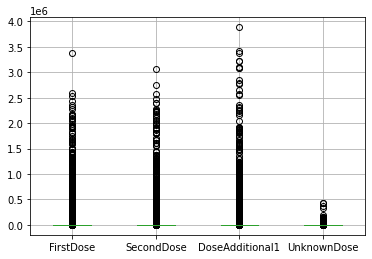

In [339]:
# chcek outliers
vaccine_boxplot = vaccine.boxplot(column=['FirstDose', 'SecondDose', 'DoseAdditional1', 'UnknownDose'])

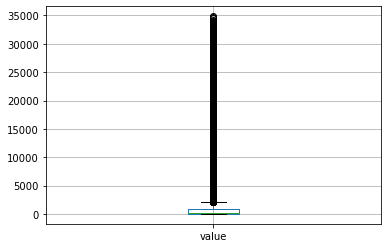

In [340]:
hospital_boxplot = hospital.boxplot(column = ['value'])

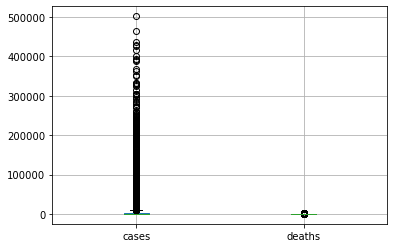

In [341]:
covid_boxplot = covid.boxplot(column = ['cases', 'deaths'])
#due to the data being a real-life record we can not consider these records outliers
#that's why we are ignoring these outliers 

# __________________________________________________________________________________________________________________________________________________

### 1. Which top-10 countries reported the most number of cases of COVID-19 each month for each year, i.e., Jan-Dec 2020, Jan-Dec 2021, and Jan-Apr 2022 (28 ×10 values)? Do you find these numbers relatively high compared to the country’s population? Do you see any connection among these countries regarding their geographical locations and the month the most cases are observed? Discuss your observations.

In [342]:
#the top 10 countries reported cases in each month of each year
q1=covid.groupby(["month","year","countriesAndTerritories","popData2020"])["cases"].sum().reset_index()
q1=q1.sort_values(by=["year", "month","cases"],ascending=False)
covid_ques1=pd.DataFrame({})
for i in range(13): #getting the top ten countries in all 12 months each year
    mont20 = q1.loc[(q1["month"] == i) & (q1["year"] == 2020)]
    mont21 = q1.loc[(q1["month"] == i) & (q1["year"] == 2021)]
    mont22 = q1.loc[(q1["month"] == i) & (q1["year"] == 2022)]
    mo20 = mont20.head(10)
    covid_ques1 = covid_ques1.append(mo20, ignore_index = True)
    mo21 = mont21.head(10)
    covid_ques1 = covid_ques1.append(mo21, ignore_index = True)
    mo22 = mont22.head(10)
    covid_ques1 = covid_ques1.append(mo22, ignore_index = True)
covid_ques1

,month,year,countriesAndTerritories,popData2020,cases
0,1,2020,Spain,47332614,33.0
1,1,2020,France,67320216,12.0
2,1,2020,Germany,83166711,11.0
3,1,2020,Finland,5525292,2.0
4,1,2020,Czechia,10693939,0.0
...,...,...,...,...,...
270,12,2021,Netherlands,17407585,489671.0
271,12,2021,Belgium,11522440,332523.0
272,12,2021,Czechia,10693939,307940.0
273,12,2021,Denmark,5822763,282604.0


In [343]:
#changing the format of the month coulmn in the data frame
month = pd.to_datetime(covid_ques1["month"], format='%m')
month = month.dt.strftime("%B")
covid_ques1["month"] = month
covid_ques1 = covid_ques1.sort_values(by=["year","month"])
covid_ques1

,month,year,countriesAndTerritories,popData2020,cases
85,April,2020,Italy,59641488,99671.0
86,April,2020,Germany,83166711,88166.0
87,April,2020,France,67320216,77453.0
88,April,2020,Spain,47332614,67621.0
89,April,2020,Belgium,11522440,33548.0
...,...,...,...,...,...
80,March,2022,Greece,10718565,608765.0
81,March,2022,Spain,47332614,409515.0
82,March,2022,Portugal,10295909,342391.0
83,March,2022,Slovakia,5457873,314466.0


In [344]:
#make a interactive dataframe
years = ['All'] + sorted(covid_ques1['year'].unique().tolist())
months = ['All'] + sorted(covid_ques1['month'].unique().tolist())

@interact
def show_articles_more_than(year = years,month = months):
    return covid_ques1.loc[(covid_ques1['year'] == year)&(covid_ques1['month'] == month)]


interactive(children=(Dropdown(description='year', options=('All', 2020, 2021, 2022), value='All'), Dropdown(d…

In [345]:
#check if the numbers are relatively high compared to the country’s population
covid_ques1["pop/cases"] = (covid_ques1["cases"]/covid_ques1["popData2020"]*100)
covid_ques1.sort_values(by = ["pop/cases"],ascending = False).head(20)
#the anwser is yes the numbers are relativly high compared to some country's population such as Danmark, France, Austria(all the top top ten countreis) 

,month,year,countriesAndTerritories,popData2020,cases,pop/cases
49,February,2022,Denmark,5822763,1022269.0,17.556425
22,January,2022,Denmark,5822763,892085.0,15.320648
15,January,2022,France,67320216,9167930.0,13.618391
79,March,2022,Austria,8901064,1173650.0,13.185502
20,January,2022,Portugal,10295909,1250156.0,12.142260
47,February,2022,Netherlands,17407585,1940581.0,11.147905
21,January,2022,Belgium,11522440,1088438.0,9.446246
50,February,2022,Austria,8901064,832137.0,9.348736
78,March,2022,Netherlands,17407585,1497661.0,8.603497
23,January,2022,Sweden,10327589,847154.0,8.202824


In [346]:
#check the connection among the countries in the month the most cases are observed
#locate the month with the most recorded cases
most_cases = covid_ques1.groupby(['year', 'month']).sum('cases') #covid_ques1.drop_duplicates(subset = ["countriesAndTerritories"])
most_cases = most_cases.loc[most_cases['cases'] == most_cases['cases'].max()]

most_cases

,,popData2020,cases,pop/cases
year,month,,,
2022,January,350795453,26589994.0,87.236249


In [347]:
#filter the dataframe and prepreparing it to the plot
most_cases_month = covid_ques1.loc[(covid_ques1['year'] == 2022) & (covid_ques1['month'] == 'January')]
most_cases_month

,month,year,countriesAndTerritories,popData2020,cases,pop/cases
15,January,2022,France,67320216,9167930.0,13.618391
16,January,2022,Italy,59641488,4857433.0,8.144386
17,January,2022,Spain,47332614,3501608.0,7.397876
18,January,2022,Germany,83166711,2918159.0,3.508807
19,January,2022,Netherlands,17407585,1289092.0,7.405347
20,January,2022,Portugal,10295909,1250156.0,12.142260
21,January,2022,Belgium,11522440,1088438.0,9.446246
22,January,2022,Denmark,5822763,892085.0,15.320648
23,January,2022,Sweden,10327589,847154.0,8.202824
24,January,2022,Poland,37958138,777939.0,2.049466


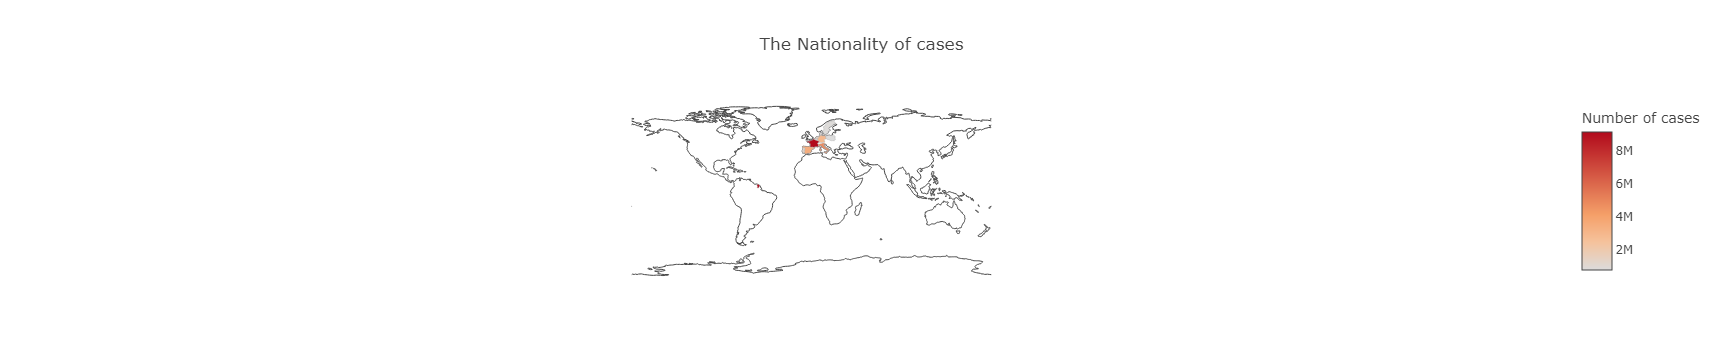

In [348]:
#plot the month with most records
worldmap = [
    dict(
        type="choropleth",
        locations=most_cases_month["countriesAndTerritories"],
        locationmode="country names",
        z=most_cases_month["cases"],
        text=most_cases_month["month"],
        autocolorscale=True,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(autotick=False, title="Number of cases"),
    )
]

layout = dict(
    title="The Nationality of cases",
    geo=dict(showframe=False, showcoastlines=True, projection=dict(type="Mercator")),
)

fig = dict(data=worldmap, layout=layout)
py.iplot(fig, validate=False)

#the plot shows that the geographical connection between these countreis is that it's close to each other
#the reason behind this high record could be becuse of the christmas and new year celebrations 

# __________________________________________________________________________________________________________________________________________________

### 2. Visualize the total number of cases and deaths in each country on a map using the geographical locations in 2020-2021.

In [349]:
#locating the rows for years 2020-2021 
covid_ques2=covid.loc[(covid["year"]==2020)|(covid["year"]==2021)]
country_deaths=covid_ques2.groupby("countriesAndTerritories")["deaths"].sum().reset_index()
country_cases=covid.groupby("countriesAndTerritories")["cases"].sum().reset_index()

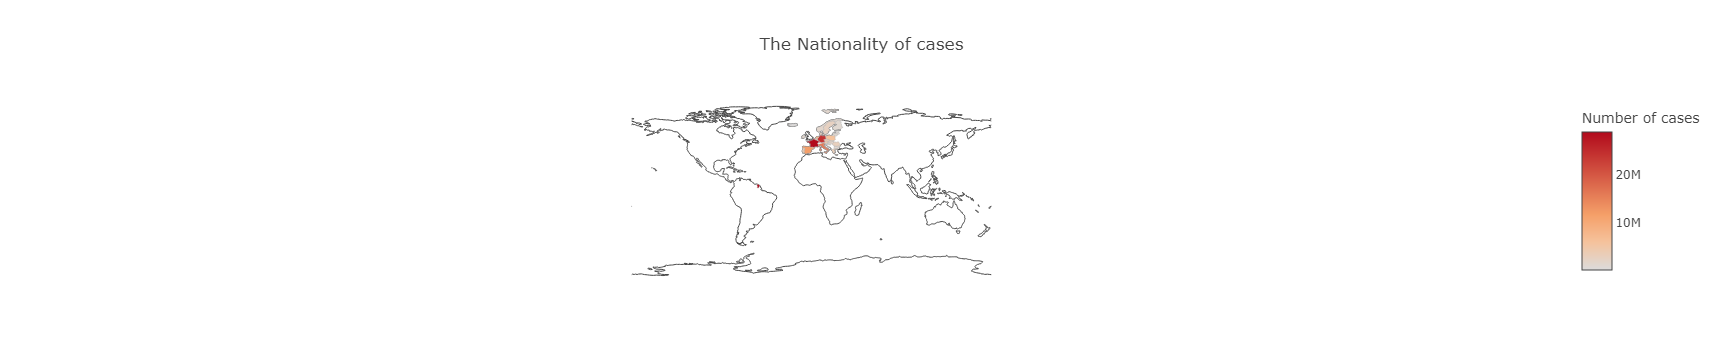

In [350]:
#ploting cases 20-21
worldmap = [
    dict(
        type="choropleth",
        locations=country_cases["countriesAndTerritories"],
        locationmode="country names",
        z=country_cases["cases"],
        autocolorscale=True,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(autotick=False, title="Number of cases"),
    )
]

layout = dict(
    title="The Nationality of cases",
    geo=dict(showframe=False, showcoastlines=True, projection=dict(type="Mercator")),
)

fig = dict(data=worldmap, layout=layout)
py.iplot(fig, validate=False)

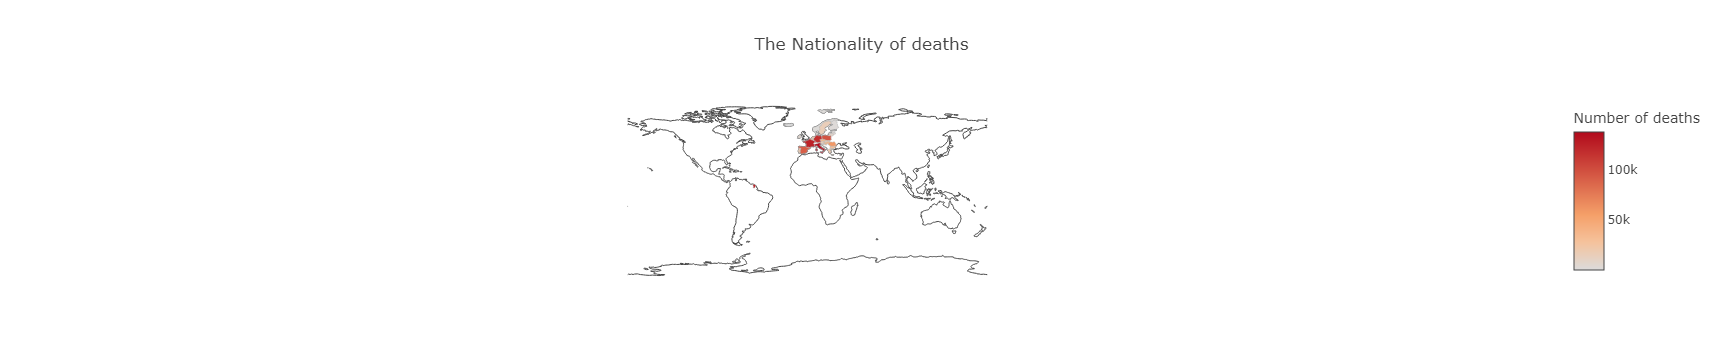

In [351]:
#ploting deaths 20-21
worldmap = [
    dict(
        type="choropleth",
        locations=country_deaths["countriesAndTerritories"],
        locationmode="country names",
        z=country_deaths["deaths"],
        autocolorscale=True,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(autotick=False, title="Number of deaths"),
    )
]

layout = dict(
    title="The Nationality of deaths",
    geo=dict(showframe=False, showcoastlines=True, projection=dict(type="Mercator")),
)

fig = dict(data=worldmap, layout=layout)
py.iplot(fig, validate=False)

# __________________________________________________________________________________________________________________________________________________

### 3. What are top-3 popular vaccine brands that have been used across EU/EEA? Group the countries based on the vaccine brands and report your findings.

In [352]:
#check the target groups 
vaccine["TargetGroup"].unique()

array(['ALL', 'Age0_4', 'Age10_14', 'Age15_17', 'Age18_24', 'Age25_49',
       'Age50_59', 'Age5_9', 'Age60_69', 'Age70_79', 'Age80+', 'Age<18',
       'AgeUNK', 'HCW', 'LTCF', '1_Age60+', '1_Age<60'], dtype=object)

In [353]:
#creating a list for target gruops under 18 and another one for countries
young_groups = ['Age0_4', 'Age10_14', 'Age15_17','Age<18','Age5_9']
countries = list(vaccine["ReportingCountry"].unique())
vaccine_filtred = pd.DataFrame({})
#filtring the dataframe from duplicates, unwanted values and target groups
for country in countries:
    vaccine_filtred = vaccine_filtred.append(vaccine.loc[(vaccine["Region"] == country) & (vaccine["TargetGroup"] == "ALL")],ignore_index = True)
    region = vaccine.loc[vaccine["Region"] == country]
    target = region["TargetGroup"].unique()
    if "Age<18" in list(target):
        vaccine_filtred = vaccine_filtred.append(vaccine.loc[(vaccine["Region"] == country) & (vaccine["TargetGroup"] == "Age<18")],ignore_index = True)
    else:
        for young_gr in young_groups:
            vaccine_filtred = vaccine_filtred.append(vaccine.loc[(vaccine["Region"] == country) & (vaccine["TargetGroup"] == young_gr)],ignore_index = True) 


In [354]:
#calculating the total doses sold to all europian countries by vaccine brand
vaccineTop3=vaccine_filtred.groupby(["Vaccine"])["FirstDose","SecondDose","UnknownDose","DoseAdditional1"].sum()
vaccineTop3["Total"]=vaccineTop3.FirstDose + vaccineTop3.SecondDose + vaccineTop3.UnknownDose + vaccineTop3.DoseAdditional1
vaccineTop3=vaccineTop3.sort_values(by="Total",ascending=False)
vaccineTop3.head(3)
#the most used vaccines used in Europe are as follows 

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/737482857.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,FirstDose,SecondDose,UnknownDose,DoseAdditional1,Total
Vaccine,,,,,
COM,241085880,237177380,8841,151196925,629469026
MOD,34568252,35590532,8606,80330388,150497778
AZ,39150562,29861289,442,17883,69030176


In [355]:
#sum the total doses of each dose column 
vaccine_ques3=vaccine_filtred.groupby(["ReportingCountry","YearWeekISO","Vaccine"])["FirstDose","SecondDose","UnknownDose","DoseAdditional1"].sum()
vaccine_ques3= vaccine_ques3.reset_index()
vaccine_ques3

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/802500533.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,ReportingCountry,YearWeekISO,Vaccine,FirstDose,SecondDose,UnknownDose,DoseAdditional1
0,AT,2020-W53,AZ,0,0,0,0
1,AT,2020-W53,COM,5323,0,0,0
2,AT,2020-W53,JANSS,0,0,0,0
3,AT,2020-W53,MOD,0,0,0,0
4,AT,2020-W53,NVXD,0,0,0,0
...,...,...,...,...,...,...,...
8983,SK,2022-W16,NVXD,31,141,0,0
8984,SK,2022-W17,COM,61,125,0,519
8985,SK,2022-W17,JANSS,12,0,0,1
8986,SK,2022-W17,MOD,2,2,0,46


In [356]:
#drop the empty rows to ensure that only the used vaccines are left
vaccine_ques3.drop(vaccine_ques3.index[(vaccine_ques3['FirstDose'] == 0) & (vaccine_ques3["SecondDose"] == 0) & (vaccine_ques3["UnknownDose"] == 0) & (vaccine_ques3["DoseAdditional1"] == 0)], inplace=True)
vaccine_ques3 = vaccine_ques3.reset_index(drop=True)

In [357]:
#removing the duplicated vaccines in each country and locate only the top 3 vaccine brands
vaccine_ques3 = vaccine_ques3.drop_duplicates(subset = ["ReportingCountry","Vaccine"])
vaccine_ques3 = vaccine_ques3.loc[(vaccine_ques3["Vaccine"] == "AZ") | (vaccine_ques3["Vaccine"] == "MOD") | (vaccine_ques3["Vaccine"] == "COM")]
vaccine_ques3

,ReportingCountry,YearWeekISO,Vaccine,FirstDose,SecondDose,UnknownDose,DoseAdditional1
0,AT,2020-W53,COM,5323,0,0,0
5,AT,2021-W02,MOD,100,0,0,0
16,AT,2021-W06,AZ,10823,0,0,0
341,BE,2020-W53,COM,975,0,0,0
344,BE,2021-W02,MOD,64,0,0,0
...,...,...,...,...,...,...,...
7520,SI,2021-W03,MOD,483,0,0,0
7525,SI,2021-W06,AZ,2162,2,0,0
7762,SK,2021-W01,COM,30165,0,0,1
7766,SK,2021-W04,MOD,72,0,0,0


In [358]:
#counting the number of top 3 vaccine brands are used in each country
vaccine_count = vaccine_ques3.groupby(["ReportingCountry"])["Vaccine"].count().reset_index()
countries = ['Austria','Belgium','Bulgaria','Cyprus','Czechia','Germany','Denmark','Estonia','Greece','Spain','Finland','France','Croatia','Hungary','Ireland','Iceland','Italy','Liechtenstein','Lithuania','Luxembourg','Latvia','Malta','Netherlands','Norway','Poland','Portugal','Romania','Sweden','Slovenia','Slovakia']

In [359]:
#adding a new column named countries to help visualize the resluts
plot_df = vaccine_ques3.groupby(["ReportingCountry"]).agg({"Vaccine": ', '.join}).reset_index()
plot_df = plot_df.sort_values("ReportingCountry")
plot_df["contries"] = countries
plot_df["vaccine count"] = vaccine_count["Vaccine"]
plot_df

,ReportingCountry,Vaccine,contries,vaccine count
0,AT,"COM, MOD, AZ",Austria,3
1,BE,"COM, MOD, AZ",Belgium,3
2,BG,"COM, MOD, AZ",Bulgaria,3
3,CY,"COM, MOD, AZ",Cyprus,3
4,CZ,"COM, MOD, AZ",Czechia,3
5,DE,"COM, MOD, AZ",Germany,3
6,DK,"COM, MOD, AZ",Denmark,3
7,EE,"COM, MOD, AZ",Estonia,3
8,EL,"AZ, COM, MOD",Greece,3
9,ES,"COM, MOD, AZ",Spain,3


# __________________________________________________________________________________________________________________________________________________

### 4. Considering the previous question, which target group mainly received these vaccine brands in each country?

In [360]:
#filtering the data frame to get the target group of each country using the top 3 vaccine brands
vaccine_ques4 = vaccine.groupby(["ReportingCountry", "Vaccine", "TargetGroup", "Region"])["FirstDose", "SecondDose", "UnknownDose", "DoseAdditional1"].sum().reset_index()
vaccine_ques4 = vaccine_ques4.loc[(vaccine_ques4["Vaccine"] == "AZ") | (vaccine_ques4["Vaccine"] == "MOD") | (vaccine_ques4["Vaccine"] == "COM")]
vaccine_ques4["TotalDose"] = vaccine_ques4["FirstDose"] + vaccine_ques4["SecondDose"] + vaccine_ques4["UnknownDose"] + vaccine_ques4["DoseAdditional1"]
vaccine_ques4

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/2189530646.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,ReportingCountry,Vaccine,TargetGroup,Region,FirstDose,SecondDose,UnknownDose,DoseAdditional1,TotalDose
0,AT,AZ,ALL,AT,815259,771972,0,872,1588103
1,AT,AZ,Age0_4,AT,21,1,0,0,22
2,AT,AZ,Age10_14,AT,63,23,0,1,87
3,AT,AZ,Age15_17,AT,371,260,0,1,632
4,AT,AZ,Age18_24,AT,44749,41005,0,43,85797
...,...,...,...,...,...,...,...,...,...
4470,SK,MOD,Age50_59,SK,30250,29939,0,18265,78454
4471,SK,MOD,Age60_69,SK,61953,61523,0,51084,174560
4472,SK,MOD,Age70_79,SK,31778,31509,0,26197,89484
4473,SK,MOD,Age80+,SK,11472,11325,0,8526,31323


In [361]:
#creating a dataframe which includes all the countries and each vaccine brand target group
target_group = pd.DataFrame({})
countries = plot_df["ReportingCountry"]
vaccine_brands = ["AZ","MOD","COM"]

for i in range(30):
    country = vaccine_ques4.loc[vaccine_ques4["ReportingCountry"] == countries[i]]
    
    for vaccine_ in vaccine_brands:  
        target = country.loc[country["Vaccine"] == vaccine_]
        All_targets = country["TargetGroup"].unique()
        
        if len(list(All_targets)) == 1:
            target_group = target_group.append(target,ignore_index = True)
        else:
            target.drop(target.index[target['TargetGroup'] == "ALL"], inplace = True)
            max_= target["TotalDose"].max()
            row = target.loc[target["TotalDose"] == max_]
            target_group = target_group.append(row, ignore_index = True)
target_group

C:\Users\karem\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ReportingCountry,Vaccine,TargetGroup,Region,FirstDose,SecondDose,UnknownDose,DoseAdditional1,TotalDose
0,AT,AZ,Age25_49,AT,268941,248737,0,234,517912
1,AT,MOD,Age25_49,AT,217476,210264,0,178108,605848
2,AT,COM,Age25_49,AT,1747460,1687554,0,1601352,5036366
3,BE,AZ,Age50_59,BE,351857,348952,0,0,700809
4,BE,MOD,Age25_49,BE,357670,353141,0,1461273,2172084
...,...,...,...,...,...,...,...,...,...
84,SI,MOD,Age70_79,SI,27947,27739,0,13414,69100
85,SI,COM,Age25_49,SI,250420,241857,0,147982,640259
86,SK,AZ,Age25_49,SK,180411,177893,0,0,358304
87,SK,MOD,Age25_49,SK,100546,99150,0,48976,248672


In [362]:
#display the countries and its vaccine brands target group in interactive way
countries = ['All'] + sorted(target_group['ReportingCountry'].unique().tolist())
@interact
def show_articles_more_than(country = countries):
    return target_group.loc[(target_group['ReportingCountry'] == country)]

interactive(children=(Dropdown(description='country', options=('All', 'AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK'…

# __________________________________________________________________________________________________________________________________________________

### 5. Which countries are the most sceptical towards the first dose of the COVID- 19 vaccine? Do you think this matter had any impact on the hospitaliza-tion level?

In [363]:
#locating the most sceptical countries which have the least number of doses per 100k people

vaccine_qeus5 = vaccine_filtred.loc[(vaccine_filtred['YearWeekISO'] >= '2021-W01') & (vaccine_filtred['YearWeekISO'] < '2021-W26')]
date = ['2021 (W01-W25)']*30

countries = ['Austria','Belgium','Bulgaria','Cyprus','Czechia','Germany','Denmark','Estonia','Greece','Spain','Finland','France','Croatia','Hungary','Ireland','Iceland','Italy','Liechtenstein','Lithuania','Luxembourg','Latvia','Malta','Netherlands','Norway','Poland','Portugal','Romania','Sweden','Slovenia','Slovakia']
vaccine_qeus5 = vaccine_qeus5.groupby(["ReportingCountry","Population"]).sum("FirstDose").reset_index()

first_dose = vaccine_qeus5.groupby(["ReportingCountry"]).sum("FirstDose").reset_index()


sceptical= pd.DataFrame({'ReportingCountry': first_dose["ReportingCountry"], "FirstDose": first_dose["FirstDose"], "Population": vaccine_qeus5["Population"]})
sceptical["Doses per 100k"] = round((sceptical['FirstDose'] / sceptical['Population'] )* 100000)
sceptical['Country'] = countries
sceptical['Date'] = date 
sceptical= sceptical.sort_values("Doses per 100k").reset_index(drop= True)
sceptical
#the most sceptical are on the top and the least are on the bottom

,ReportingCountry,FirstDose,Population,Doses per 100k,Country,Date
0,BG,936816,6916548,13545.0,Bulgaria,2021 (W01-W25)
1,RO,4732475,19201662,24646.0,Romania,2021 (W01-W25)
2,LV,604044,1893223,31906.0,Latvia,2021 (W01-W25)
3,SK,1989531,5459781,36440.0,Slovakia,2021 (W01-W25)
4,HR,1512875,4036355,37481.0,Croatia,2021 (W01-W25)
5,SI,806899,2108977,38260.0,Slovenia,2021 (W01-W25)
6,EE,543833,1330068,40888.0,Estonia,2021 (W01-W25)
7,LT,1219154,2795680,43608.0,Lithuania,2021 (W01-W25)
8,PL,16704719,37840001,44146.0,Poland,2021 (W01-W25)
9,EL,4757591,10678632,44552.0,Greece,2021 (W01-W25)


C:\Users\karem\AppData\Local\Temp/ipykernel_32804/2575586228.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/2575586228.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/2575586228.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

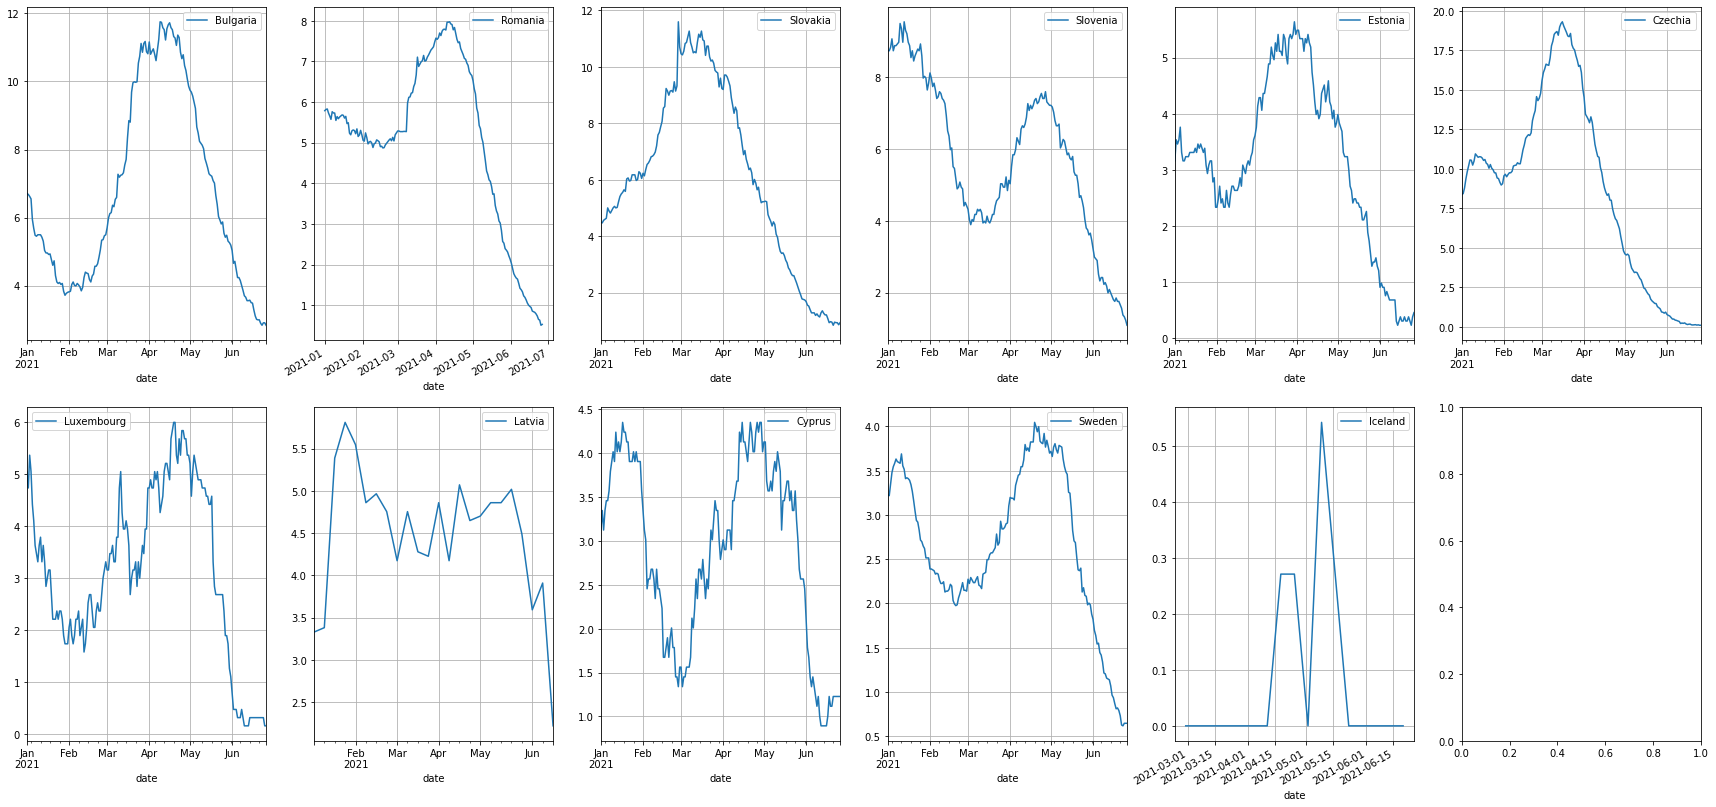

In [364]:
#check the daily ICU occupancy of the least/most scepticalcountries

countries =['Bulgaria', 'Romania', 'Slovakia', 'Slovenia','Estonia', 'Czechia', 'Luxembourg',
       'Latvia', 'Cyprus', 'Sweden', 'Iceland']
hos = hospital.loc[(hospital['date'] >= '2021-01-01') & (hospital['date'] < '2021-06-27')]
fig, axes = plt.subplots(nrows=2, ncols=6)

for  indx,country in enumerate(countries):
    pop =sceptical.loc[sceptical['Country'] == country ]['Population']
    k = hos.loc[(hospital['country'] == country) & (hospital['indicator'] == 'Daily ICU occupancy')]
    k['pop'] = (k.value / int(pop)) * 100000
    ax = axes[int(indx / 6), indx % 6]
    k.plot(x = 'date', y = 'pop', label = country ,figsize = (30,15), grid = True, ax= ax)
    

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/1930120392.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/1930120392.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\karem\AppData\Local\Temp/ipykernel_32804/1930120392.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

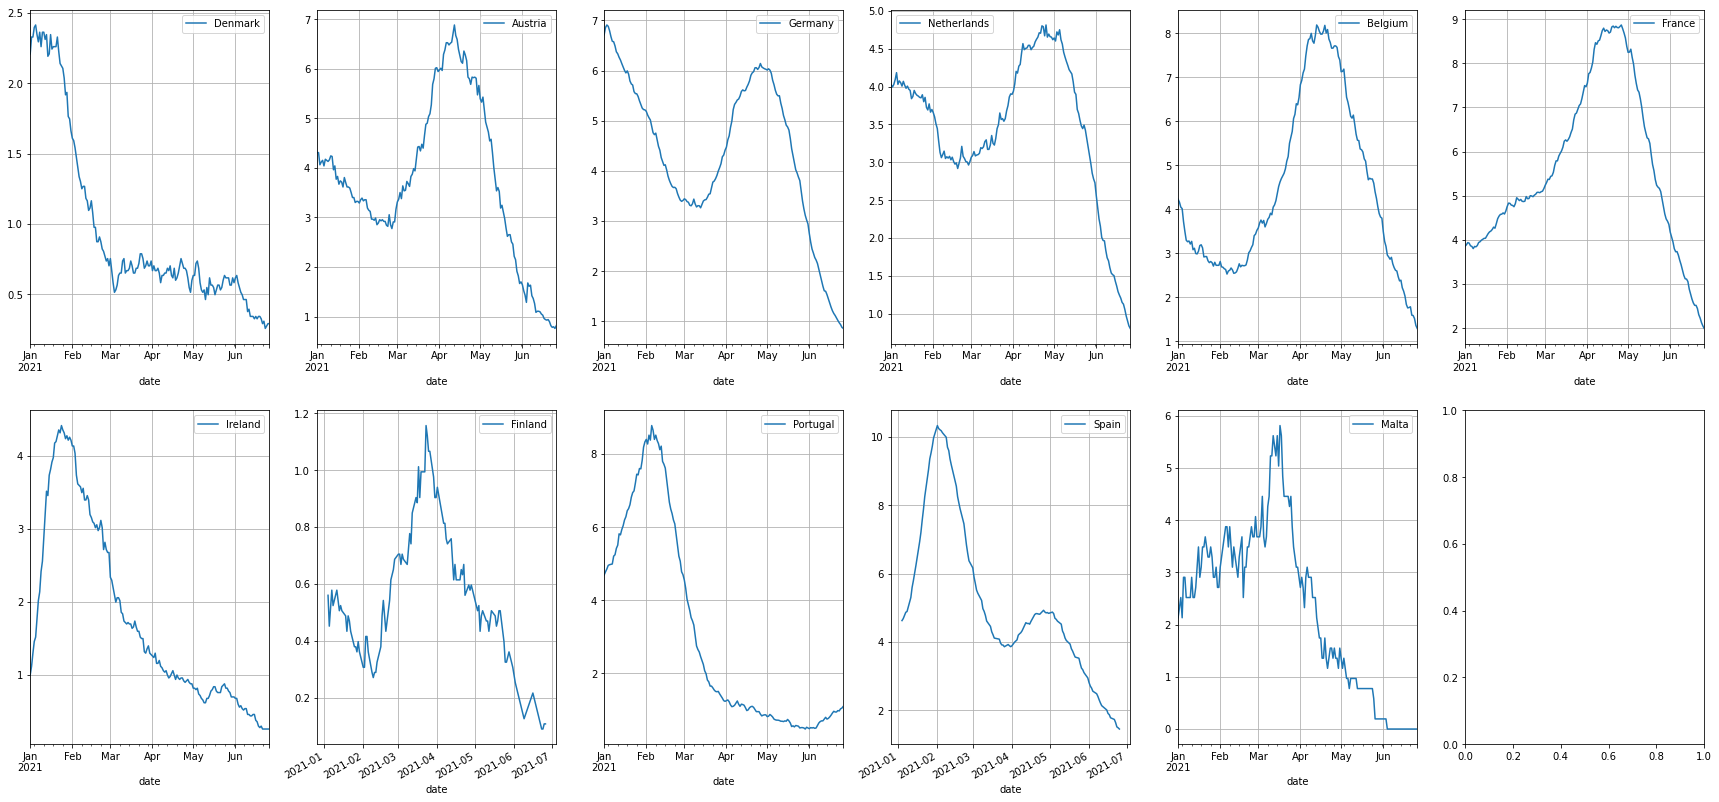

In [365]:
#check the daily ICU occupancy of the least/most scepticalcountries

countries = ['Denmark', 'Austria', 'Germany', 'Netherlands', 'Belgium', 
        'France', 'Ireland', 'Finland', 'Portugal', 'Spain', 'Malta']

fig, axes = plt.subplots(nrows= 2, ncols=6)
for  idx,country in enumerate(countries):
    pop = sceptical.loc[sceptical['Country'] == country ]['Population']
    k = hos.loc[(hospital['country'] == country) & (hospital['indicator'] == 'Daily ICU occupancy')]
    k['pop'] = (k.value / int(pop)) * 100000
    ax = axes[int(idx / 6), idx % 6]
    k.plot(x = 'date', y = 'pop', label = country ,figsize = (30,15), grid = True, ax= ax)
    
#no, we don't see a remarkable affect on the hospitalisation level especially on the ICU
#####Remember to inclde the fact about the effectiveness of covid-19 vaccine



# __________________________________________________________________________________________________________________________________________________

### 6. Rank, all EU/EEA countries, based on their vaccinated population under age 18 for the first dose of the covid_19 vaccine, which countries have the most and least vaccinated people under age 18 in regards to their total populations?

In [366]:
#ranking all the countries based on their vaccinated population under age 18 for the first dose of the covid_19 vaccine
vaccine_ques6 = vaccine.groupby(["ReportingCountry", "TargetGroup", "Region"])["FirstDose"].sum().reset_index()
all_targets = vaccine_ques6["TargetGroup"].unique()
young_groups = ['Age0_4', 'Age10_14', 'Age15_17', 'Age<18', 'Age5_9']
countries = list(vaccine_ques6['ReportingCountry'].unique())
vaccine_ques6 = vaccine_ques6.loc[(vaccine_ques6["TargetGroup"] == "Age0_4")|(vaccine_ques6["TargetGroup"] == "Age10_14")|(vaccine_ques6["TargetGroup"] == "Age15_17")|(vaccine_ques6["TargetGroup"] == "Age<18")|(vaccine_ques6["TargetGroup"] == 'Age5_9')]
vac_pop = pd.DataFrame({})
no_target = []
for i in range(30):
    country = vaccine_ques6.loc[vaccine_ques6["Region"] == countries[i]]
    no_target.append(str(country["ReportingCountry"].unique()))
    for p in young_groups:
        target = country.loc[country["TargetGroup"] == p]
        All = country["TargetGroup"].unique()
        if "Age<18" in list(All):
            if p == "Age<18":
                vac_pop = vac_pop.append(target,ignore_index=True)
        else:
            vac_pop = vac_pop.append(target, ignore_index=True)

    
vac_pop = vac_pop.groupby(["ReportingCountry"]).sum("FirstDose").reset_index()
pop_lis = []
for i in vac_pop["ReportingCountry"]:
    pop = sceptical.loc[sceptical['ReportingCountry'] == i ]['Population']
    pop_lis.append(int(pop))
vac_pop["Population"] = pop_lis
vac_pop["VAC/POP"] = (vac_pop["FirstDose"]/vac_pop["Population"])*100
vac_pop = vac_pop.sort_values("VAC/POP")
vac_pop

#lest is BG and most is IS

,ReportingCountry,FirstDose,Population,VAC/POP
2,BG,26733,6916548,0.386508
11,HR,34653,4036355,0.858522
25,RO,268580,19201662,1.398733
27,SI,43484,2108977,2.061853
28,SK,114480,5459781,2.096787
26,SE,281598,10379295,2.713074
17,LT,89369,2795680,3.196682
4,CZ,413779,10701777,3.866451
6,EE,52537,1330068,3.949948
3,CY,37101,896007,4.140704


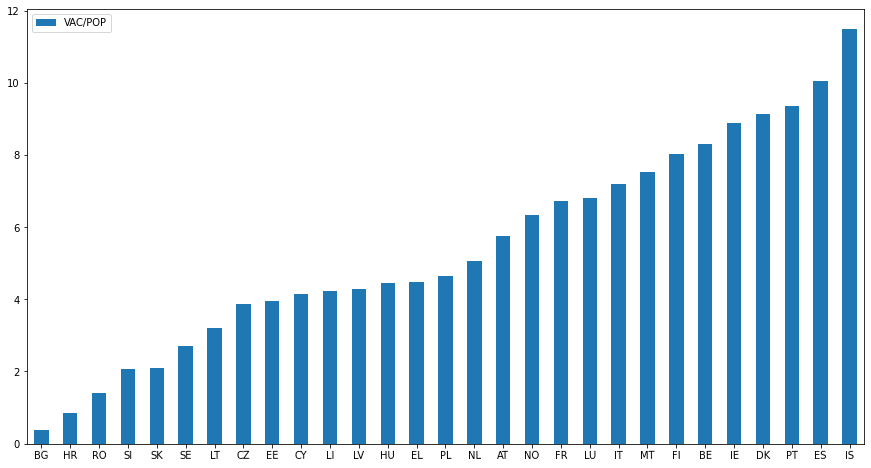

In [367]:
#plot the percentege of the young vaccinated populatiuon
df = pd.DataFrame({'VAC/POP': list(vac_pop['VAC/POP'])}, index = list(vac_pop['ReportingCountry']))
ax = df.plot.bar(rot = 1, figsize = (15, 8))

# __________________________________________________________________________________________________________________________________________________

### 7. Which countries have the oldest vaccinated populations in regards to their total people for the second dose of the covid_19 vaccine?

In [368]:
#ranking all the countries based on their vaccinated population over age 60 for the second dose of the covid_19 vaccine

vaccine_ques6 = vaccine.groupby(["ReportingCountry","TargetGroup","Region"])["SecondDose"].sum().reset_index()
all_targets = vaccine_ques6["TargetGroup"].unique()
aged_groups = ['Age60_69', 'Age70_79', 'Age80+']

vaccine_ques6 = vaccine_ques6.loc[(vaccine_ques6["TargetGroup"] == "Age60_69")|(vaccine_ques6["TargetGroup"] == "Age70_79")|(vaccine_ques6["TargetGroup"] == "Age80+")]
vac_pop = pd.DataFrame({})
no_target = []

for i in range(30):
    land = vaccine_ques6.loc[vaccine_ques6["Region"] == countries[i]]
    no_target.append(str(land["ReportingCountry"].unique()))
    for p in aged_groups:
        target = land.loc[land["TargetGroup"] == p]
        All = land["TargetGroup"].unique()
        if "Age<18" in list(All):
            if p == "Age<18":
                vac_pop = vac_pop.append(target,ignore_index = True)
        else:
            vac_pop = vac_pop.append(target, ignore_index = True)

    
vac_pop = vac_pop.groupby(["ReportingCountry"]).sum("SecondDose").reset_index()
pop_lis = []
for i in vac_pop["ReportingCountry"]:
    pop = sceptical.loc[sceptical['ReportingCountry'] == i ]['Population']
    pop_lis.append(int(pop))
vac_pop["Population"] = pop_lis
vac_pop["VAC/POP"] = (vac_pop["SecondDose"]/vac_pop["Population"])*100
vac_pop = vac_pop.sort_values("VAC/POP")
vac_pop = vac_pop.reset_index(drop = True)
vac_pop

,ReportingCountry,SecondDose,Population,VAC/POP
0,BG,675306,6916548,9.763628
1,RO,1973951,19201662,10.280105
2,SK,911518,5459781,16.695139
3,LV,327495,1893223,17.298279
4,LU,110662,634730,17.434500
5,PL,7116258,37840001,18.806178
6,LT,553771,2795680,19.808097
7,EE,266544,1330068,20.039878
8,IS,74473,368792,20.193768
9,CY,182217,896007,20.336560


# __________________________________________________________________________________________________________________________________________________

### 8.  Which countries’ health care were most affected by the coronavirus pan-demic in 2020 compared to others?

In [369]:
#vi ser att daily hospital occupancy är mest gensam mellan alla länder jämfört med andra indekatorer
#Vi tar datan för år 2020 och de rekorder som har indekatorn daily hospital occupancy



In [370]:
#filtering the data to get the most affected health care during the pandemic in 2020
hos = hospital.loc[(hospital['date'] >= '2020-01-01')& (hospital['date'] < '2021-01-01')]
ho = pd.DataFrame({'country': [], 'date': [], 'year_week': [], 'total addmissions': []})
countries = list(hos['country'].unique())

In [371]:
#sum all the daily occupancy

for country in countries:
    kk = hos.loc[(hos['country'] == country) & (hos['indicator'] == 'Daily hospital occupancy')].reset_index(drop = True)
    daily_value = 0
    count = 0
    for ind, week  in enumerate(kk['year_week']):
        valu = kk['value'].iloc[ind]
        if valu > daily_value:
            valu, daily_value = valu - daily_value, valu
            count += valu
        else:
            daily_value = valu
        try:
            kk['year_week'].iloc[ind+1]
        except:
            ho = ho.append({'country': kk['country'].iloc[ind], 'date': kk['date'].iloc[ind], 'year_week': kk['year_week'].iloc[ind], 'total addmissions': count}, ignore_index = True)
            count = 0
        else:
            if kk['year_week'].iloc[ind+1] != week:
                ho = ho.append({'country': kk['country'].iloc[ind], 'date': kk['date'].iloc[ind], 'year_week': kk['year_week'].iloc[ind], 'total addmissions': count}, ignore_index = True)
                count = 0
            
            


In [372]:
#calculate the total addmissions i each country
ho = ho.groupby(ho['country']).sum('total addmissions').reset_index()

In [373]:
#adding a population coulmn to be able to calculate the total addmissions per population of each country
pop_lis=[]
for i in list(ho['country']):
    pop =sceptical.loc[sceptical['Country'] == i ]['Population']
    pop_lis.append(int(pop))
ho["Population"]=pop_lis
ho["ADD/POP"]=(ho['total addmissions']/ho["Population"])

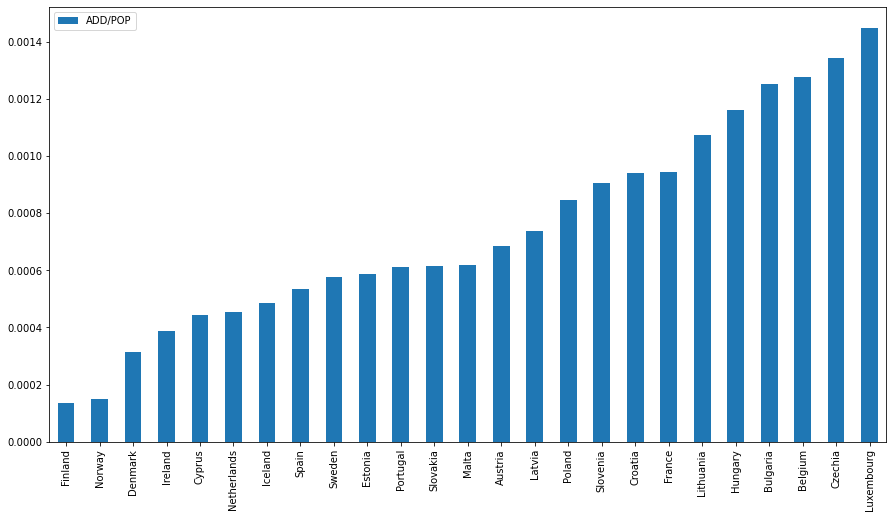

In [374]:
#plot the result of the affected countries's health care
ho = ho.sort_values('ADD/POP')
df_1= pd.DataFrame({'ADD/POP': list(ho['ADD/POP'])}, index =list(ho['country']))
ax = df_1.plot.bar(rot = 2, figsize= (15, 8))
ax.set_xticklabels(df_1.index,rotation=90);